In [1]:
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(42)

# Generate Example

Text(0.5, 1.0, 'Nodes and Agents in 2D Space')

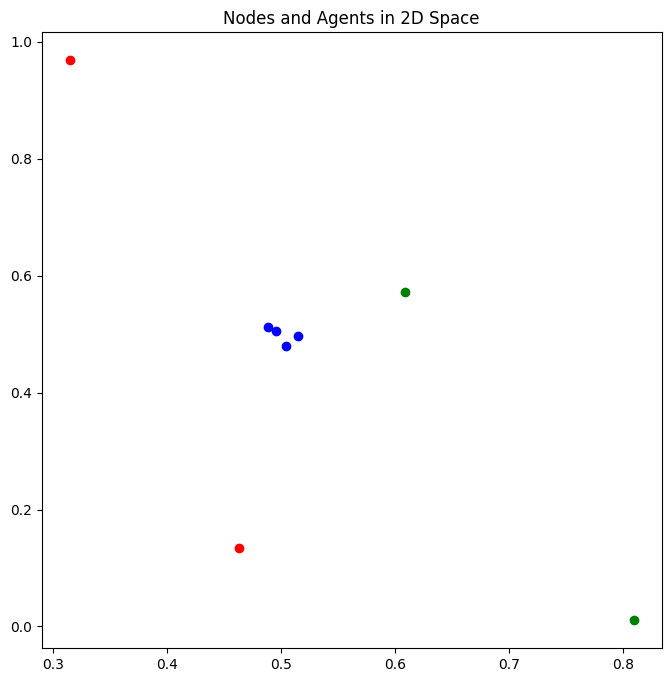

In [24]:
# create a dataset of nodes and agents
num_nodes = 4
num_agents = 2
dim = 2  # dimension of the space
def generate_example(dim=2, num_nodes=30, num_agents=20):
    nodes = 0.5 + 0.01 * np.random.randn(1, num_nodes, dim)  # centered at [0.5, 0.5] with small perturbation
    s = np.random.rand(num_agents,1, dim)
    e = np.random.rand(num_agents,1, dim)
    return s, e, nodes
s, e, Y_init = generate_example(num_nodes=num_nodes, num_agents=num_agents, dim=dim)
# plot the nodes and agents
plt.figure(figsize=(8, 8))
plt.scatter(Y_init[0, :, 0], Y_init[0, :, 1], c='blue', label='Nodes')
plt.scatter(s[:, 0, 0], s[:, 0, 1], c='red', label='Start Points')
plt.scatter(e[:, 0, 0], e[:, 0, 1], c='green', label='End Points')
plt.title('Nodes and Agents in 2D Space')

# PSO

=== PSO Results ===
Best Cost: 0.5940
Elapsed Time: 7.5214 seconds
Node positions (y):
[[0.48671381 0.47796533]
 [0.58109055 0.43148934]
 [0.64143882 0.29891   ]
 [0.58766947 0.37681671]]
Agent paths (eta):
[[0 3 2 1 4]
 [0 1 3 2 4]]
Agent 0 path:
Node 0 -> Node 3 -> Node 2 -> Node 1 -> End
Agent 1 path:
Node 0 -> Node 1 -> Node 3 -> Node 2 -> End


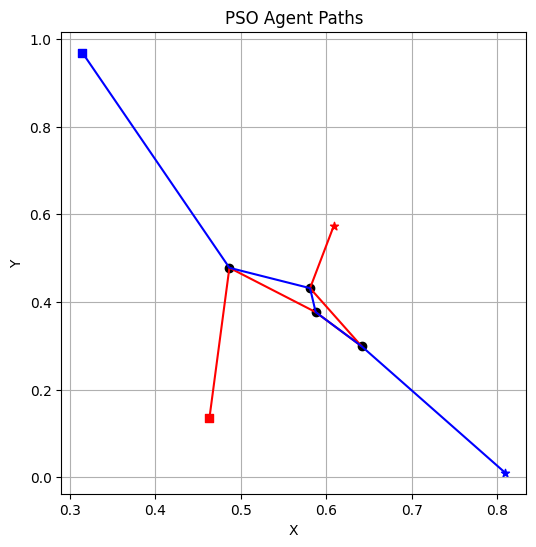

In [25]:
# run the PSO algorithm
from PSO import pso, pso_plot, pso_print

num_particles = 500
num_iters = 300
w = 0.9 # inertia weight
c1 = 0.5  # cognitive (individual) weight
c2 =1.5  # social (group) weight
y_final, eta_final, global_best_cost, elapsed_time = pso(
    s,
    e,
    num_nodes,
    num_agents,
    dim,
    Y_init=Y_init,
    verbose=False,
    w=w,
    c1=c1,
    c2=c2,
    num_particles=num_particles,
    num_iters=num_iters,
)
pso_print(y_final, eta_final, global_best_cost, elapsed_time, s, e)
pso_plot(y_final, eta_final, s, e)

# Genetic Algorithm

GA Solution:
Best Cost: 0.3513
Elapsed Time: 0.55s
Node positions (y):
  Node 0: [0.58010942 0.52951571]
  Node 1: [0.4417292  0.71626951]
  Node 2: [0.60218166 0.25743559]
  Node 3: [0.61444518 0.39582946]
Agent 0 path:
Node 2  -> Node 3  -> Node 0  -> Node 0  -> End
Agent 1 path:
Node 1  -> Node 0  -> Node 3  -> Node 2  -> End


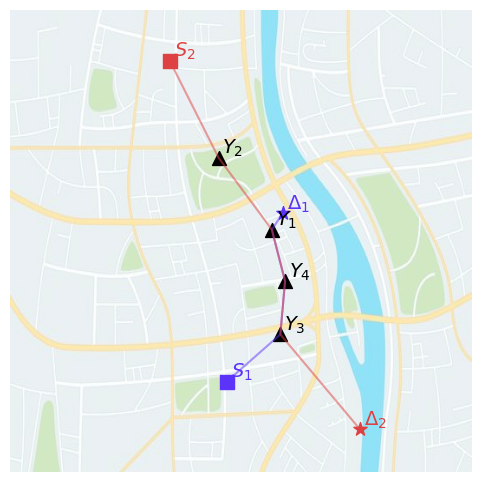

In [26]:
from GA import ga, ga_plot, ga_print
best_y, best_eta, best_cost, elapsed_time = ga(
        s,
        e,
        num_nodes,
        num_agents,
        dim,
        Y_init=None,
        verbose=False,
        pop_size=100,
        generations=100,
        mutation_rate=0.3,
       
    )
ga_print(s, e, best_y, best_eta, best_cost, elapsed_time)
ga_plot(s, e, best_y, best_eta)

# SA

Final solution:
Node positions (y):
  Node 0: [0.57039164 0.36283129]
  Node 1: [0.47850717 0.30416625]
  Node 2: [0.45452487 0.7578258 ]
  Node 3: [0.56760075 0.45296174]
Agent paths (eta):
  Agent 0: Node 1 -> Node 0 -> Node 3 -> Node 0 -> End
  Agent 1: Node 2 -> Node 3 -> Node 3 -> Node 0 -> End
Start positions (s):
  Agent 0: [0.46333771 0.1349996 ]
  Agent 1: [0.31475431 0.96855383]
End positions (e):
  Agent 0: [0.60854932 0.57225385]
  Agent 1: [0.80932022 0.01051768]


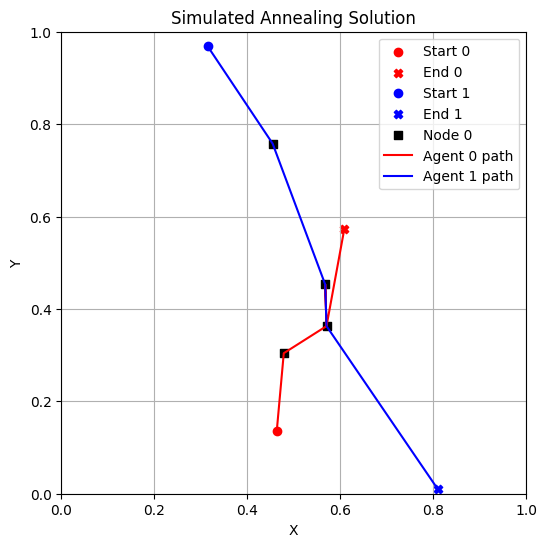

In [27]:
from SA import sa, plot_sa, print_sa
best_y, best_eta, best_cost, elapsed_time = sa(
        s,
        e,
        num_nodes,
        num_agents,
        dim,
        Y_init=Y_init,
        YMIN=0,
        YMAX=1.0,
        iters=1000,
        verbose=False,
    )
print_sa(s, e, best_y, best_eta)
plot_sa(s, e, best_y, best_eta)

# CEM

CEM Solution:
Best Cost: 0.4027
Elapsed Time: 1.50 seconds
Node positions (y):
[[0.84969104 0.52912292]
 [0.54168155 0.49114185]
 [0.42797846 0.73081901]
 [0.58351805 0.28953567]]
Agent paths (indices):
Agent 0: Node 3 -> Node 3 -> Node 1 -> Node 1 -> End
Agent 1: Node 2 -> Node 1 -> Node 3 -> Node 3 -> End


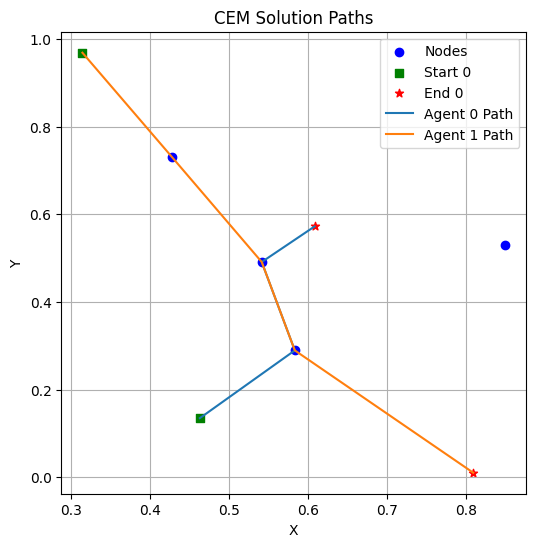

In [28]:
from CEM import cem, plot_cem, print_cem
best_y, best_eta, best_cost, elapsed_time = cem(
        s,
        e,
        num_nodes,
        num_agents,
        dim,
        Y_init=Y_init,
        YMIN=0,
        YMAX=1.0,
        n_iter=100,
        pop_size=100,
        elite_frac=0.2,
        verbose=False,
    )
print_cem(s, e, best_y, best_eta, best_cost, elapsed_time)
plot_cem(s, e, best_y, best_eta)

# ACO

Iter   0 | Best Cost: 0.7195
Iter  50 | Best Cost: 0.7089
Iter 100 | Best Cost: 0.7089
Iter 150 | Best Cost: 0.7089
Iter 199 | Best Cost: 0.6538
Best Cost: 0.6538, Time: 2.75s
Optimal node locations:
Node 0: [0.67574031 0.34782909]
Node 1: [0.55784288 0.52780808]
Node 2: [0.52992613 0.39643843]
Node 3: [0.4421953  0.38648841]

Agent 0: node 3 -> node 1 -> node 0 -> node 2
Agent 1: node 1 -> node 3 -> node 2 -> node 0


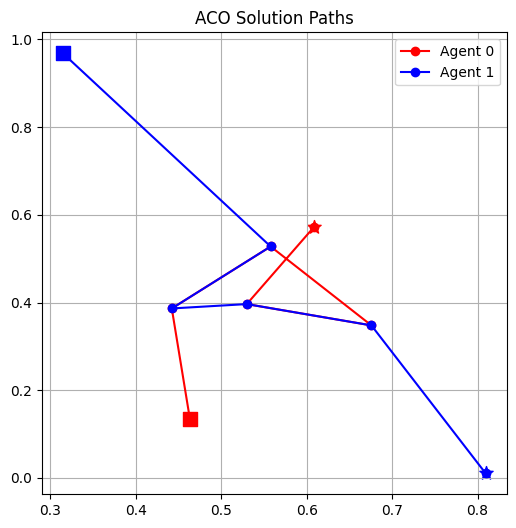

In [33]:
from ACO import aco, plot_aco, print_aco
best_y, best_eta, best_cost, elapsed_time = aco(
    s,
    e,
    num_nodes,
    num_agents,
    dim,
    Y_init=Y_init,
    YMIN=0.0,
    YMAX=1.0,
    num_iters=200,
    num_ants=100,
    alpha=1.0,
    beta=1.0,
    rho=0.5,
    Q=1.0,
    verbose=True,
)
print_aco(s, e, num_nodes, num_agents, dim, best_y, best_eta)
plot_aco(s, e, num_nodes, num_agents, dim, best_y, best_eta)

# Results